<a href="https://colab.research.google.com/github/RAHULRAJ666DX/Ambitionbox-Job-Profile-Web-Scraping-Project/blob/main/Ambitionbox_Job_Profile_Web_Scraping_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ambitionbox JOB portal Web Scraping Project**

## **The goal of this project is to use web scraping with Beautiful Soup to gather data on job roles related to Data Science like company name, ratings, and reviews from Ambition Box, and then convert the data into a CSV format for further analysis.** 

## **Importing all necessary Project**

In [2]:
# Importing libraries for EDA

import numpy as np
import pandas as pd

# Importing Request, BeautifulSoup library

import requests
from bs4 import BeautifulSoup

## **Fetching Data**

### **we are using "requests.get" to fetch the website details**

In [3]:
requests.get('https://www.ambitionbox.com/list-of-companies?page=1', 'html.parser')

<Response [403]>

**We need to use header for this website because it is denying access**

---


 - headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}

In [190]:
# website link
url = 'https://www.ambitionbox.com/list-of-companies?designation=data-analyst,business-analyst,data-scientist,data-engineer,senior-data-analyst,senior-business-analyst,analyst&sort_by=popularity&page=1'

<!doctype html>
<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">
  <head >
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1">
    <meta http-equiv="X-UA-Compatible" content="IE=edge"> 
    <title>List of companies - 10.7k companies | AmbitionBox</title><meta data-n-head="ssr" name="copyright" content="2023 AmbitionBox"><meta data-n-head="ssr" name="revisit-after" content="1 day"><meta data-n-head="ssr" name="application-name" content="AmbitionBox"><meta data-n-head="ssr" name="content-language" content="EN"><meta data-n-head="ssr" name="google-signin-client_id" content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com"><meta data-n-head="ssr" property="fb:app_id" content="712617688793459"><meta data-n-head="ssr" name="theme-color" content="#ffffff"><meta data-n-head="ssr" name="msapplication-navbutton-color" content="#ffffff"><meta data-n-head="ssr" name="appl
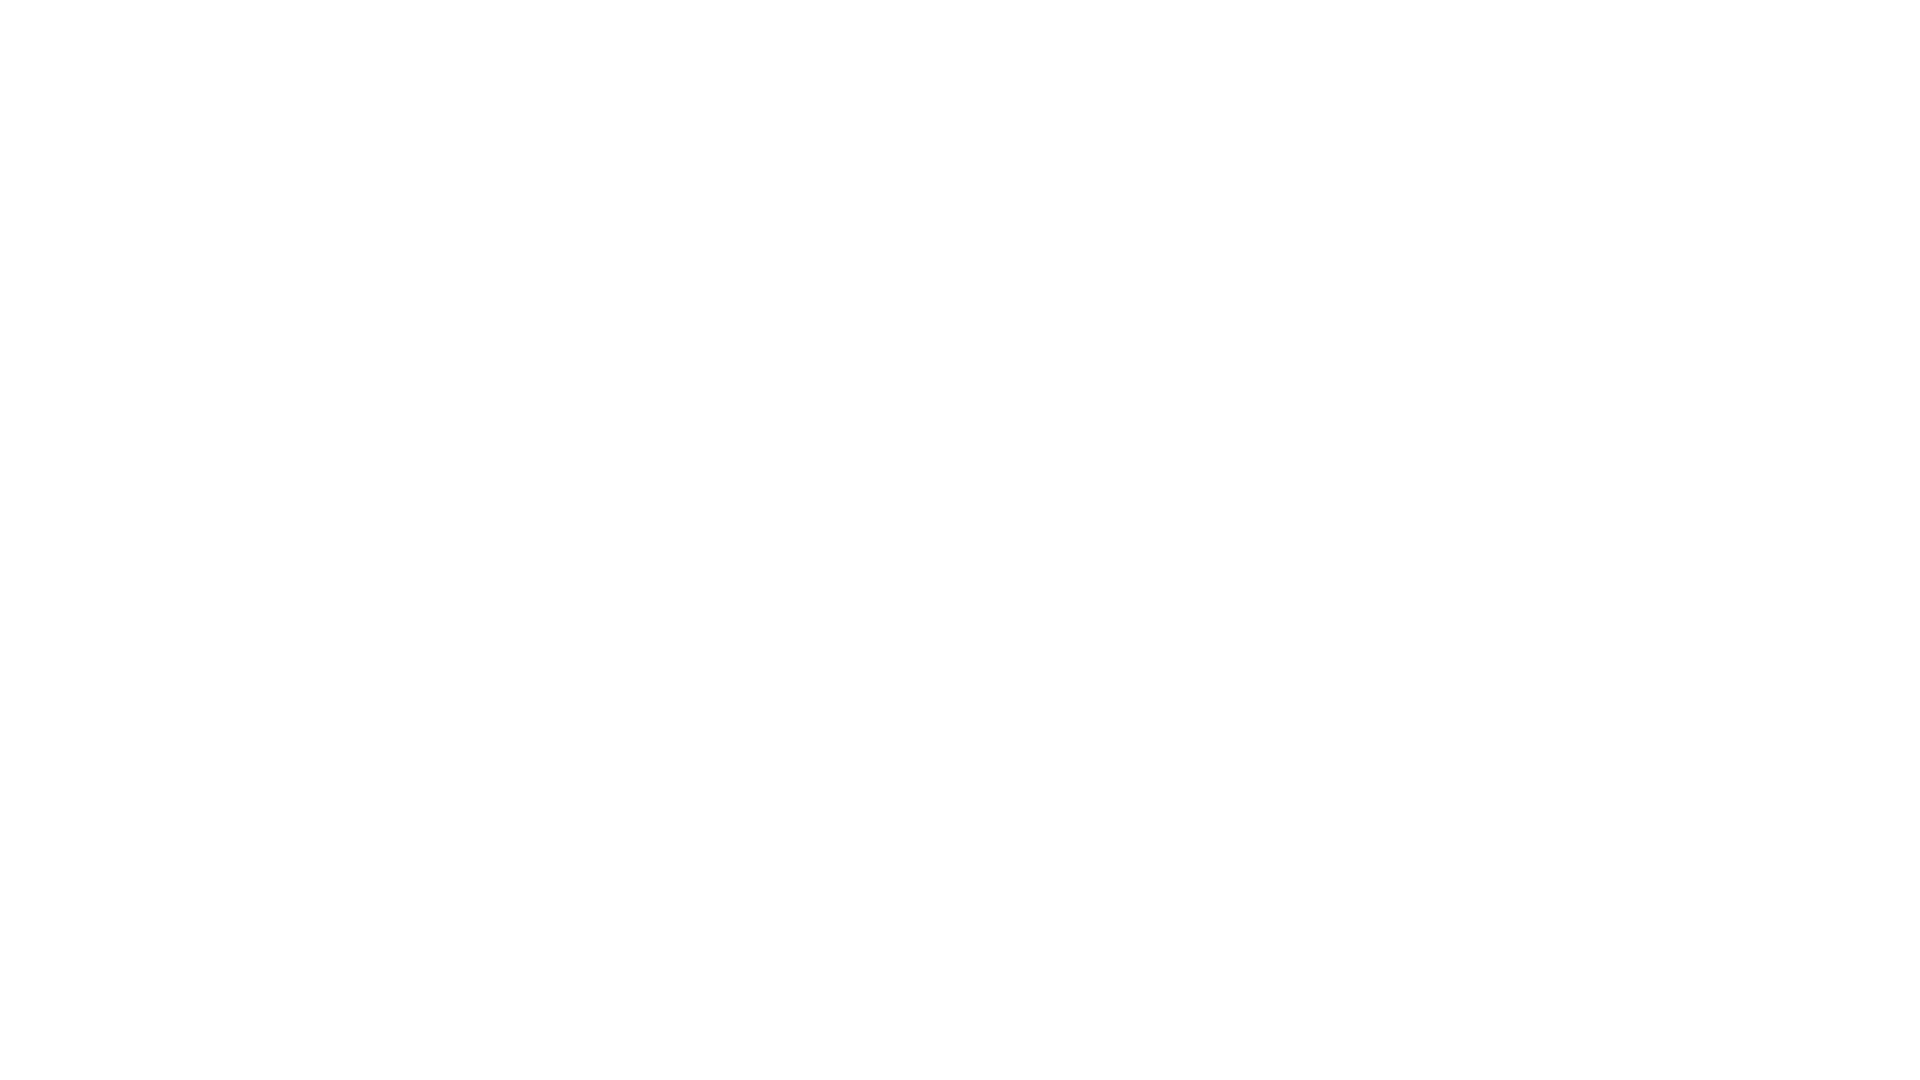

In [191]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.8',
    'Accept-Encoding': 'gzip, deflate, br',
    'Referer': 'https://colab.research.google.com/drive/1Vdw1LuSJ_2w9DWdb7Vpc9Jdp6PzXo0fd#scrollTo=if5OqNWI3Atj'
}
response = requests.get(url, headers=headers).text
print(response)

### **We are using BeautifulSoup to fetch data from Website**

In [192]:
soup=(BeautifulSoup(response,'lxml')) # can also use html.parser

In [ ]:
print(soup)

In [194]:
# Checking an example whether the soup is working or not
soup.find_all('h1')[0].text

'List of companies in India'

## To find company **Names**

We are using H2 to identify and find to retrive **Title** data 

In [195]:
title = soup.find('h2')
title.text.strip()

'TCS'

**Since the Code is working we can loop for every other title in the webpage**

In [205]:
Name = []
for name in soup.find_all('h2'):
  print(name.text.strip())
  Name.append(name.text.strip())

TCS
Accenture
Deloitte
eClerx
HCLTech
Wipro
Capgemini
Cognizant
Genpact
GlobalLogic
KPMG
Evalueserve
R1 RCM
IBM
NatWest Group
HCL Group
Deutsche Bank
Ernst & Young
Automatic Data P...
Better.com
EXL Service
HSBC
Fidelity Nationa...
Societe Generale
BNY Mellon
Teleperformance
Tech Mahindra
JP Morgan Chase
American Express
First Source


## **For fetching Ratings of the Companies** 

In [197]:
# For the first company data
first_rating = soup.find('p', class_='rating')
first_rating.get_text().strip()

'3.9'

**Now looping for every rating**  

In [198]:
Rating = []
ratings = soup.find_all('p', class_='rating')
for rating in ratings:
    print(rating.get_text().strip())
    Rating.append(float(rating.get_text().strip()))

3.9
4.1
4.1
3.6
3.8
3.9
3.9
4.0
4.0
4.0
3.8
3.7
4.0
4.2
4.1
3.8
4.2
3.8
4.2
2.9
3.9
4.1
4.1
3.9
4.2
3.6
3.7
4.2
4.4
3.9


In [199]:
print(len(Rating))
print(Rating)

30
[3.9, 4.1, 4.1, 3.6, 3.8, 3.9, 3.9, 4.0, 4.0, 4.0, 3.8, 3.7, 4.0, 4.2, 4.1, 3.8, 4.2, 3.8, 4.2, 2.9, 3.9, 4.1, 4.1, 3.9, 4.2, 3.6, 3.7, 4.2, 4.4, 3.9]


**We collected 30 ratings for the first 30 Companies**

## **To Collect total Reviews per Company**

In [200]:
# For the first company data
first_Review = soup.find('a',class_='review-count sbold-Labels')
first_Review.get_text().strip()

'(50.4k Reviews)'

### **Now looping for every Review**  

In [201]:
Review_list = []
Review = soup.find_all('a',class_='review-count sbold-Labels')
for revs in Review:
    print(revs.get_text().strip())
    Review_list.append(revs.get_text().strip())

(50.4k Reviews)
(32.2k Reviews)
(10.3k Reviews)
(3.1k Reviews)
(18.4k Reviews)
(28.8k Reviews)
(23.9k Reviews)
(29.7k Reviews)
(19.4k Reviews)
(2.3k Reviews)
(3.9k Reviews)
(707 Reviews)
(1.6k Reviews)
(15.2k Reviews)
(2.1k Reviews)
(24.1k Reviews)
(2.1k Reviews)
(6.3k Reviews)
(2.1k Reviews)
(537 Reviews)
(5.2k Reviews)
(5.7k Reviews)
(3.9k Reviews)
(1.4k Reviews)
(2.6k Reviews)
(14.4k Reviews)
(21.5k Reviews)
(3.5k Reviews)
(1.9k Reviews)
(3.1k Reviews)


In [17]:
print(len(Review_list))
print(Review_list)

30
['(50.4k Reviews)', '(32.2k Reviews)', '(10.3k Reviews)', '(3.1k Reviews)', '(18.4k Reviews)', '(28.8k Reviews)', '(23.9k Reviews)', '(29.7k Reviews)', '(19.4k Reviews)', '(2.3k Reviews)', '(3.9k Reviews)', '(707 Reviews)', '(1.6k Reviews)', '(15.2k Reviews)', '(2.1k Reviews)', '(24.1k Reviews)', '(2.1k Reviews)', '(6.3k Reviews)', '(2.1k Reviews)', '(537 Reviews)', '(5.2k Reviews)', '(5.7k Reviews)', '(3.9k Reviews)', '(1.4k Reviews)', '(2.6k Reviews)', '(14.4k Reviews)', '(21.5k Reviews)', '(3.5k Reviews)', '(1.9k Reviews)', '(3.1k Reviews)']


**We collected 30 Reviews for the first 30 Companies**

#We collected **Name, Ratings** and **Reviews** for all the Companies in the first webpage 
## For the rest of the webpages we can iterate them all by combining in a single loop so that we can go to multiple Webpages in a single Code snippet  

### **Creating a DataFrame for the Data fetched**

In [206]:
df=pd.DataFrame({'name':Name,
   'rating':Rating,
   'reviews':Review_list,
}) 

In [207]:
print(df.shape)
df.head()

(30, 3)


,name,rating,reviews
0,TCS,3.9,(50.4k Reviews)
1,Accenture,4.1,(32.2k Reviews)
2,Deloitte,4.1,(10.3k Reviews)
3,eClerx,3.6,(3.1k Reviews)
4,HCLTech,3.8,(18.4k Reviews)


#**Now creating a loop for all the Webpages**

In [171]:
Name = []
Rating = []
Review_list = []
for i in range(0,334):
  url = f"https://www.ambitionbox.com/list-of-companies?designation=data-analyst,business-analyst,data-scientist,data-engineer,senior-data-analyst,senior-business-analyst,analyst&sort_by=popularity&page={i}"
  headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.8',
    'Accept-Encoding': 'gzip, deflate, br',
    'Referer': 'https://colab.research.google.com/drive/1Vdw1LuSJ_2w9DWdb7Vpc9Jdp6PzXo0fd#scrollTo=if5OqNWI3Atj'}
  response = requests.get(url, headers=headers).text
  soup=(BeautifulSoup(response,'lxml'))
  for name in soup.find_all('h2'):
    Name.append(name.text.strip())
  ratings = soup.find_all('p', class_='rating')
  for rating in ratings:
    Rating.append(float(rating.get_text().strip()))

  Review = soup.find_all('a',class_='review-count sbold-Labels')
  for revs in Review:
    Review_list.append(revs.get_text().strip())


In [172]:
print(len(Name))
print(len(Rating))
print(len(Review_list))

9988
9923
9923


## Since the Lists are not of the same length we will use **CONCAT** instead of just passing them into a dataframe 

In [175]:
complete_df = pd.concat([pd.DataFrame(Name), pd.DataFrame(Rating),pd.DataFrame(Review_list)], axis=1)
complete_df

,0,0,0
0,TCS,3.9,(50.4k Reviews)
1,Accenture,4.1,(32.2k Reviews)
2,Deloitte,4.1,(10.3k Reviews)
3,eClerx,3.6,(3.1k Reviews)
4,HCLTech,3.8,(18.4k Reviews)
...,...,...,...
9983,ABVOLT,NaN,NaN
9984,ANOUD TECHNOLOGI...,NaN,NaN
9985,28one partnershi...,NaN,NaN
9986,Parallon,NaN,NaN


In [176]:
complete_df.shape

(9988, 3)

## Exporting to a **CSV** and **EXCEL**

In [179]:
complete_df.to_csv('Companies with Data science Jobs')

In [182]:
complete_df.to_excel("Companies with Data science Jobs.xlsx")

### **We have Successfully Collected 9988 Companies data from the website and created a CSV file which can now be used for EDA or any other Operation**